In [ ]:
'''
    =================================================
    Milestone 1

    Nama  : Taliida Nabilah K. 
    Batch : HCK - 013
    
    Evaluate Next Quarter Business Strategy by Analyzing Bank Customer Churn Cases from Last Quartal 
    =================================================
'''

Link Dashboard : https://public.tableau.com/app/profile/taliida.nabilah/viz/BanksCustomerChurnAnalysis/Dashboard2

**1. PROBLEM IDENTIFICATION**


**Topic : Evaluate Next Quarter Business Strategy by Analyzing Bank Customer Churn Cases from Last Quartal**



**Background : I am a Data Analyst for a bank that facing the increasement of churn customer number from the last quartal. The Bank wants to evaluate and makes data driven strategy for the next quartal and reducing the number of churned customer. I required to give insights based on customer churn reports from last quartal in order to decrease its number.** 


**SMART ANALYSIS**

**Specific :** Participating in important role to create the bank's next quarter strategy making where the goal is decreasing the bank's customer churn number from the last quarter customer churn reports. 

**Measurement :** establish measureable metrics to track progress and sucess by this case in decreasing the churn rate number to 10%

**Achieveable :** Analyze relevant data of customer churn number form the last quarter reports and making insight that could be utilized for the next quarter business strategy

**Relevant :** Making sure that the insight could give impact and relevant to the Bank's situation and possible to implemet

**Time-bound :** Creating the insights from the analysis in 1 week and make sure that are ready to implement within 3 weeks ahead. Making this project is ready to implemented within 1 month in total


**Problem Statement : Participating as data analyst to create the bank's next quarter strategy by analyze and create insights based on customer churn reports from the last quarter in order to decrease 10% the customer's churn rate number within 1 week and 1 month in total for implementation.**

**Breakdown the Problem by 5W + 1 H Methods**

**Who:** 
 Who is the customer of the Bank that has churned (Based on Gender, Age, Income,Residence )

**What :** 
 What is characteristic of the customer who has churn tendency? 

**When :** (data visualization)
 When is the customer usually has churn tendency based on the tenure on the bank?

**Where :** (data visualization)
Where is the country that has most churn numbers?

**Why :** (inferernsial)
Why people has churn tendency? (Could make assumption and hipotesis by finding the correlation between variables : creditscore,balance, number of products, has Credit Card, Active Member)
 
**How :** (data visualization)
How many customer that hasn't churned (based on Gender, Age, Income,Residence) to retain?



**2. DATA LOADING**

In [3]:
#import pandas
import pandas as pd 

In [4]:
# Data Loading from csv file
data = pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


data source : https://www.kaggle.com/code/carlosalvro/bank-churn-analisys

**3. DATA CLEANING**

In [5]:
# Make a new copy for data exploration
clean_data = data.copy()

In [6]:
# Drop row number column and drop duplicated values 
clean_data = clean_data.drop_duplicates().drop("RowNumber",axis=1)


In [7]:
clean_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9997,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


In [8]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        9999 non-null   object 
 4   Gender           10000 non-null  object 
 5   Age              9999 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        9999 non-null   float64
 10  IsActiveMember   9999 non-null   float64
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 1.1+ MB


In [9]:
# Drop Nan Value data 

clean_data = clean_data.dropna()

We found 5 data with NaN values out of 10,000 total data points. Given that this represents only 0.05% of the entire dataset, and considering it's a small fraction with a similar proportion to the rest of the data, I have decided to drop these data points

In [10]:
# Changing data type into needed type

clean_data["Age"] = clean_data["Age"].astype('int')

clean_data["HasCrCard"] = clean_data["HasCrCard"].astype('int')

clean_data["IsActiveMember"] = clean_data["IsActiveMember"].astype('int')

 


C:\Users\ACER\AppData\Local\Temp\ipykernel_5504\4014764606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["Age"] = clean_data["Age"].astype('int')
C:\Users\ACER\AppData\Local\Temp\ipykernel_5504\4014764606.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["HasCrCard"] = clean_data["HasCrCard"].astype('int')
C:\Users\ACER\AppData\Local\Temp\ipykernel_5504\4014764606.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [11]:
print(clean_data.isnull().sum())

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


**4. ANALYSIS AND CALCULATION**

**1.Who is the customer of the Bank that has churned (Based on Gender, Age, Income,Residence )**

In [12]:
#importing needed library
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
#filtering churned customer data only
churned_data = clean_data[clean_data['Exited']==1]

In [14]:
# counting the total churned customer 
len(churned_data)

print("total churned customer :",len(churned_data))

total churned customer : 2037


In [61]:
#Counting the current period churn rate
total_churn_rate = (len(churned_data)/len(clean_data)*100)
total_churn_rate

20.3781512605042

a. Based on gender

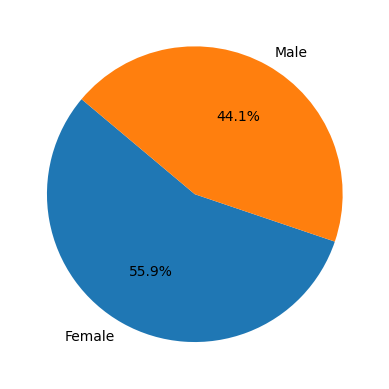

In [62]:
dts = churned_data.groupby('Gender').size().reset_index(name='Total')
gender_img = plt.pie(dts['Total'], labels=dts['Gender'], autopct='%1.1f%%', startangle=140)



**Insight :** From the visualization highlights we can see that out of the total 2037 churned customers, 55.9% are female and 44.1% are male. This indicates that there is a slightly higher representation of female customers among those who churned compared to male customers.

     Knowing the gender distribution among churned customers can help in designing targeted marketing strategies. For instance, if there are discernible differences in churn behavior between genders, marketing campaigns could be tailored accordingly to address the specific needs or preferences of male and female customers. Male and female customers may have different preferences for different products or services, which could account for the gender gap in churn rates. In order to better serve the demands of both male and female consumers, it can be helpful to analyze the kinds of goods and services that each gender prefers.

     it can also delivering us to developing gender-specific retention strategies can help mitigate churn and improve customer loyalty. For example, offering personalized incentives, loyalty programs, or customer support channels tailored to the preferences of male and female customers can enhance engagement and encourage retention.

b. Based on age

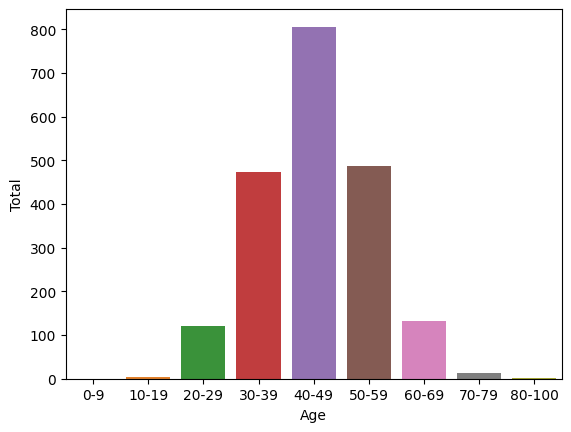

In [63]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 100]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-100']

# Create new column with age ranges
# pd.cut(clean_data['Age'], bins=age_bins, labels=age_labels, right=False)

age_img = sns.barplot(data=churned_data.groupby(pd.cut(clean_data['Age'], bins=age_bins, labels=age_labels, right=False)).size().reset_index(name='Total'), x='Age', hue='Age', 
             y='Total', errorbar=None) 

**Insights :**  

**High Churn Rate in the 40-49 Age Group:**  The age group of 40-49 years shown the highest churn rate, with more than 800 customers churning. This indicates that individuals in their 40s may be particularly able to switching banks or discontinuing services, suggesting a need for targeted retention efforts within this demographic.

**Moderate Churn Rates in the 30-39 and 50-59 Age Groups:** The age ranges of 30-39 and 50-59 both show moderate churn rates. Age range 30-39 has churned between 450 and 500 customers, while age range 50-59 has churned below 500 but higher than the 30-39 range. This suggests that individuals in their thirties and fifties also exhibit notable churn behavior, albeit at slightly lower levels compared to those in their forties.

c. Based on Salary

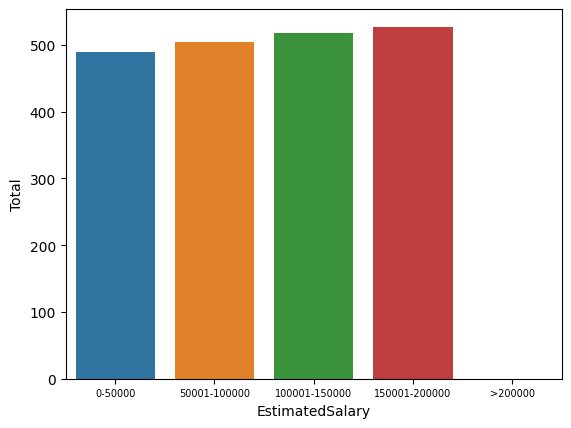

In [64]:
salary_bins = [0, 50000, 100000, 150000, 200000, 999999999]
salary_labels = ['0-50000', '50001-100000', '100001-150000', '150001-200000', '>200000']


xx = sns.barplot(data=churned_data.groupby(pd.cut(clean_data['EstimatedSalary'], bins=salary_bins, labels=salary_labels, right=False)).size().reset_index(name='Total'), x='EstimatedSalary', hue='EstimatedSalary', 
             y='Total', errorbar=None) 

churned_data.groupby(pd.cut(clean_data['EstimatedSalary'], bins=salary_bins, labels=salary_labels, right=False)).size().reset_index(name='Total')
xx.tick_params(axis='x', labelsize=7)

**Insights:** The data indicates a relatively balanced distribution of churned customers across different estimated salary ranges. The churned customer counts range from 489 to 527 across the various salary brackets, suggesting that churn is not significantly skewed towards any particular income level.

d. Based on residence

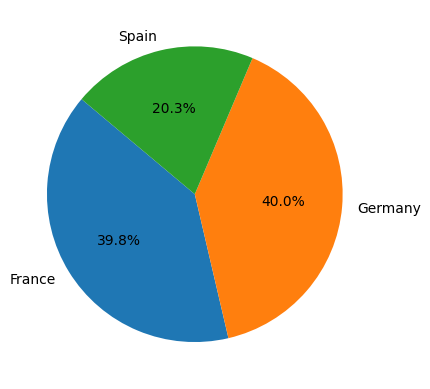

In [65]:

dts = churned_data.groupby('Geography').size().reset_index(name='Total')
geog = plt.pie(dts['Total'], labels=dts['Geography'], autopct='%1.1f%%', startangle=140) 

**Insights:** The data reveals that both France and Germany have similar total numbers of churned customers, with France having 39.8 % churned customers and Germany having 40 % churned customers. This suggests that the churn rates in these two countries are comparable, indicating potential similarities in factors influencing customer churn across these regions. Spain has a notably lower total number of churned customers compared to France and Germany, with only 20.3 % churned customers. This indicates that the churn rate in Spain is relatively lower compared to the other two countries. 

**2. When is the customer usually has churn tendency based on the tenure on the bank?**

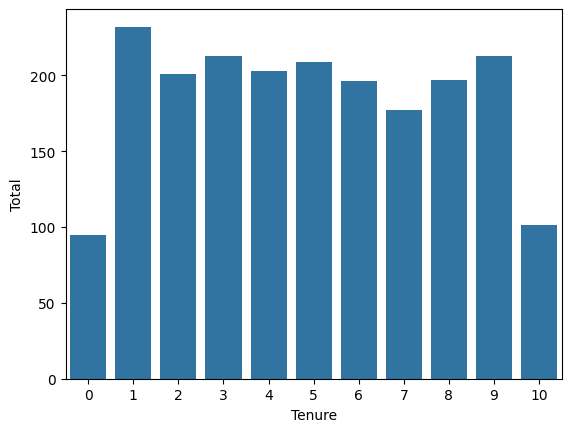

In [66]:

xx = sns.barplot(data=churned_data.groupby('Tenure').size().reset_index(name='Total'), x='Tenure',
             y='Total', errorbar=None) 

**Insights:** The data indicates variability in churn rates across different tenure periods. While some tenure periods have relatively high churn rates (e.g., 1 year with 232 churned customers), others have lower churn rates (e.g., 10 years with 101 churned customers). This suggests that the likelihood of churn may vary depending on how long a customer has been with the bank.

***3. How customer that has been churned compared to customers that hasn't churned? (based on Gender, Age, Residence) to retain?***

In [67]:
not_churned_data = clean_data[clean_data['Exited']!=1] 
len(not_churned_data)

7959

a. Based on gender

,Gender,Exited,Total
0,Female,0,3403
1,Female,1,1139
2,Male,0,4556
3,Male,1,898


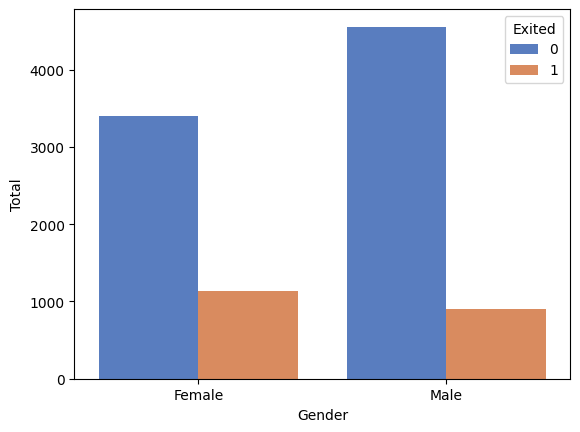

In [68]:
Gender_mapping = clean_data.groupby(['Gender', 'Exited']).size().reset_index(name='Total') 
# Create bar plot with two colors
sns.barplot(data=Gender_mapping, x='Gender', y='Total', hue='Exited', palette='muted')

Gender_mapping

**Insights:** 

    Gender Distribution Among Churned and Not Churned Customers: The data provides insights into the gender distribution among churned and not churned customers. The majority of customers in both categories are male, with 4556 not churned and 898 churned male customers. Female customers, while fewer in number, also exhibit a significant presence in both churned (1139) and not churned (3403) categories.

    Higher Churn Rate Among Female Customers: Despite being a minority in the overall customer base, female customers have a higher churn rate compared to male customers. The data shows that 1139 out of 4542 (25.06%) female customers churned, whereas only 898 out of 5454 (16.45%) male customers churned. This suggests that female customers may be more likely to churn compared to male customers, indicating a potential need for targeted retention efforts within this demographic.

b. Based on age

<Axes: xlabel='AGE_RANGE', ylabel='COUNT'>

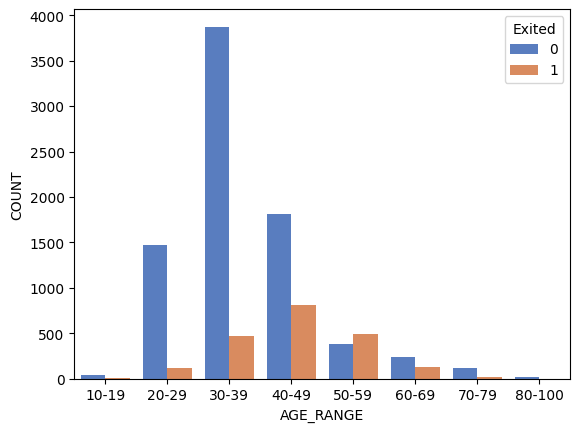

In [69]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 100]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-100']

age_mapping = (clean_data.assign(AGE_RANGE=pd.cut(clean_data['Age'], right=False,
                      bins=age_bins,
                      labels=age_labels)
                 .astype('string')
          )
   .groupby(['Exited', 'AGE_RANGE'], as_index=False).agg(COUNT=('AGE_RANGE', 'count'))
)             
 
# Create bar plot with two colors
sns.barplot(data=age_mapping, x='AGE_RANGE', y='COUNT', hue='Exited', palette='muted')



In [70]:
age_mapping

,Exited,AGE_RANGE,COUNT
0,0,10-19,46
1,0,20-29,1470
2,0,30-39,3873
3,0,40-49,1810
4,0,50-59,381
5,0,60-69,243
6,0,70-79,122
7,0,80-100,14
8,1,10-19,3
9,1,20-29,121


**Insight :** 

    Churned customers are generally lower in number across all age ranges compared to not churned customers: Churned customers represent a smaller portion of the total customer base in each age range compared to not churned customers

    Not churned customers outnumber churned customers significantly in most age ranges: The count of not churned customers is substantially higher than churned customers across all age ranges, indicating that most customers do not churn.

    Churn rates tend to increase with age, peaking in the middle-aged groups (30-39 and 40-49): The number of churned customers is highest in the 40-49 age range for churned customers, whereas for not churned customers, the highest number is in the 30-39 age range. This suggests that individuals in their thirties and forties may be more likely to churn compared to younger or older age groups.

c. Based on Geography

<Axes: xlabel='Geography', ylabel='Total'>

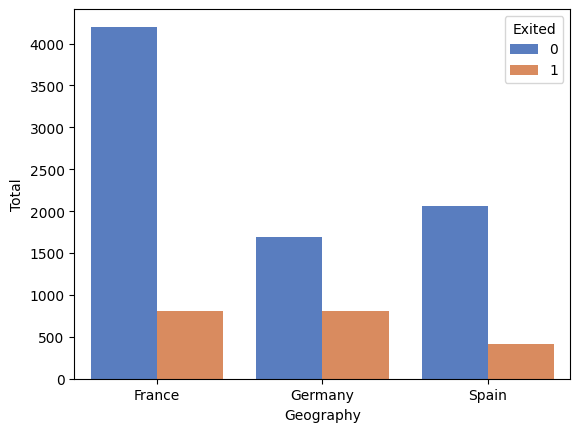

In [71]:
Geography_mapping = clean_data.groupby(['Geography', 'Exited']).size().reset_index(name='Total') 
# Create bar plot with two colors
sns.barplot(data=Geography_mapping, x='Geography', y='Total', hue='Exited', palette='muted')

In [72]:
Geography_mapping

,Geography,Exited,Total
0,France,0,4201
1,France,1,810
2,Germany,0,1695
3,Germany,1,814
4,Spain,0,2063
5,Spain,1,413


**Insights :**

**Churn Rate Comparison Across Countries:**

France: The churn rate in France can be calculated by dividing the number of churned customers (810) by the total number of customers (4201 + 810 = 5011), resulting in a churn rate of approximately 16.17%.
Germany: Similarly, the churn rate in Germany can be calculated as the number of churned customers (814) divided by the total number of customers (1695 + 814 = 2509), resulting in a churn rate of approximately 32.45%.
Spain: For Spain, the churn rate can be calculated by dividing the number of churned customers (413) by the total number of customers (2063 + 413 = 2476), resulting in a churn rate of approximately 16.68%.
Comparing these churn rates, we observe that Germany has the highest churn rate, followed by Spain, while France has the lowest churn rate.

**Comparison Between Churned and Not Churned Customers in Each Geography:**

France: In France, the percentage of churned customers (810) out of the total customers (5011) is approximately 16.17%. The percentage of not churned customers (4201) out of the total customers (5011) is approximately 83.83%.
Germany: In Germany, the percentage of churned customers (814) out of the total customers (2509) is approximately 32.45%. The percentage of not churned customers (1695) out of the total customers (2509) is approximately 67.55%.
Spain: In Spain, the percentage of churned customers (413) out of the total customers (2476) is approximately 16.68%. The percentage of not churned customers (2063) out of the total customers (2476) is approximately 83.32%.
Comparing churned and not churned percentages within each geography, we can observe the proportion of churned customers relative to the total customer base in each country. This provides insights into the magnitude of churn and the composition of customers in terms of churn status within each geography.

    Germany has the highest total number of churned customers (814), followed by France (810), and Spain (413). However, when considering the total customer base in each country, Germany has a smaller total number of customers compared to France and Spain. This indicates that the churn rate is relatively higher in Germany compared to France and Spain.

**4. What is characteristic of the customer who has churn tendency? (descriptive) (tenure, balance, number of product, salary)**


In [73]:

#Pada kolom Tenure
print('Median of Tenure :', churned_data['Tenure'].median())
print('Mean of Tenure :', churned_data['Tenure'].mean())
print('Standard Deviation of Tenure :', churned_data['Tenure'].std())
print('Skewness of Tenure :', churned_data['Tenure'].skew())
print('Kurtosis of Tenure :', churned_data['Tenure'].kurtosis(),'\n')


#Pada kolom Balance
print('Median of Balance :', churned_data['Balance'].median())
print('Mean of Balance :', churned_data['Balance'].mean())
print('Standard Deviation of Balance :', churned_data['Balance'].std())
print('Skewness of Balance :', churned_data['Balance'].skew())
print('Kurtosis of Balance :', churned_data['Balance'].kurtosis(),'\n')


#Pada kolom NumOfProducts
print('Median of NumOfProducts :', churned_data['NumOfProducts'].median())
print('Mean of NumOfProducts :', churned_data['NumOfProducts'].mean())
print('Standard Deviation of NumOfProducts :', churned_data['NumOfProducts'].std())
print('Skewness of NumOfProducts :', churned_data['NumOfProducts'].skew())
print('Kurtosis of NumOfProducts :', churned_data['NumOfProducts'].kurtosis(),'\n')

#Pada kolom EstimatedSalary
print('Median of Estimated Salary :', churned_data['EstimatedSalary'].median())
print('Mean of Estimated Salary :', churned_data['EstimatedSalary'].mean())
print('Standard Deviation of Estimated Salary :', churned_data['EstimatedSalary'].std())
print('Skewness of Estimated Salary :', churned_data['EstimatedSalary'].skew())
print('Kurtosis of Estimated Salary :', churned_data['EstimatedSalary'].kurtosis(),'\n')



Median of Tenure : 5.0
Mean of Tenure : 4.932744231713304
Standard Deviation of Tenure : 2.9361062684311996
Skewness of Tenure : 0.05191966479331796
Kurtosis of Tenure : -1.17801173220309 

Median of Balance : 109349.29
Mean of Balance : 91108.53933726068
Standard Deviation of Balance : 58360.794815855304
Skewness of Balance : -0.5127317438747061
Kurtosis of Balance : -0.9277988639479458 

Median of NumOfProducts : 1.0
Mean of NumOfProducts : 1.4752086401570939
Standard Deviation of NumOfProducts : 0.8015205454864539
Skewness of NumOfProducts : 1.5703200417581102
Kurtosis of NumOfProducts : 1.4422746143894298 

Median of Estimated Salary : 102460.84
Mean of Estimated Salary : 101465.67753068237
Standard Deviation of Estimated Salary : 57912.418070799045
Skewness of Estimated Salary : -0.03310390131791528
Kurtosis of Estimated Salary : -1.2122752601944147 



**Insights :**

**Tenure:**

The median value of the tenure is 5.0, with a mean of approximately 4.93 years.
Customers with a churn tendency may have a slightly lower tenure compared to the overall median and mean tenure. However, the skewness and kurtosis of the tenure distribution implies that it is probably normally distributed with a slight right skewness, which indicates that churned customers may not exhibit significant deviations in tenure from the overall distribution.

**Balance:**

The median value of customers balance is $109,349.29, with a mean of approximately $91,108.54.
Customers with a churn tendency may have a balance distribution similar to the overall distribution, as it implied by the skewness and kurtosis values close to zero.

**Number of Products:**

The median number of products held by customers is 1.0, with a mean of approximately 1.48 products.
Customers with a churn tendency may tend to hold fewer products compared to the overall median and mean. The positive skewness and kurtosis of the number of products distribution indicate that churned customers are more likely to have a lower number of products, with a right-skewed distribution.

**Estimated Salary:**

The median estimated salary of customers is $102,460.84, with a mean of approximately $101,465.68.
Customers with a churn tendency may have a similar estimated salary distribution to the overall distribution, as indicated by the skewness and kurtosis values close to zero. However, there is a slight left skewness in the estimated salary distribution, suggesting that customers with lower estimated salaries may have a slightly higher likelihood of churn.

**5. Why people has churn tendency? (Could make assumption and hipotesis by finding the correlation between variables : creditscore,balance, number of products, has Credit Card, Active Member)**
 

To find the correlation between independent variables and dependant variable (churned or not churn) I'm using chi-squared method to find the correlation. Since the data type of the churn decision is binary (yes/no) and the other variabel as categorical datas, therefore, for the data that hasn't got its category I created the category based on what its needed

Based on Credit Score

In [74]:
#Importing needed library
from scipy import stats
import numpy as np 


# Creating Category for Credit Score
N = len(clean_data)
credit_low, credit_up = stats.norm.interval(0.95,loc=clean_data['CreditScore'].mean(),scale=clean_data['CreditScore'].std()/np.sqrt(N))
print('Lower Limit of Credit Score:', credit_low)
print('Upper Limit of Credit Score:', credit_up)

clean_data['credit_score_bucket']  = np.where(clean_data['CreditScore'] <= credit_low, 'LOW', 
                            np.where(clean_data['CreditScore'] >= credit_up, 'HIGH', 'MEDIUM'))


# Perform chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(clean_data['credit_score_bucket'], clean_data['Exited']))

# Hitung jumlah churn (0) dan tidak churn (1) untuk setiap kategori kredit score
churn_counts = clean_data.groupby(['credit_score_bucket', 'Exited']).size().unstack(fill_value=0)

# # Hitung proporsi churn (yes) dari total jumlah data di setiap kategori 
churn_proportions = churn_counts.div(churn_counts.sum(axis=1), axis=0)

print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table: ", expected, "\n")
print(churn_counts, "\n")
print(churn_proportions)


Lower Limit of Credit Score: 648.6091137535395
Upper Limit of Credit Score: 652.3974888875168
Chi-squared statistic: 7.968013853118188
p-value: 0.018610917156318282
Degrees of freedom: 2
Expected frequencies table:  [[3950.83613445 1011.16386555]
 [3872.0105042   990.9894958 ]
 [ 136.15336134   34.84663866]] 

Exited                  0     1
credit_score_bucket            
HIGH                 4007   955
LOW                  3820  1043
MEDIUM                132    39 

Exited                      0         1
credit_score_bucket                    
HIGH                 0.807537  0.192463
LOW                  0.785523  0.214477
MEDIUM               0.771930  0.228070


C:\Users\ACER\AppData\Local\Temp\ipykernel_5504\983631295.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['credit_score_bucket']  = np.where(clean_data['CreditScore'] <= credit_low, 'LOW',


**Insights :**

The Chi-squared result is aproximately 7.97 it's indicates the strength of this association. The larger the Chi-squared value, the stronger the association between the variables.

We have hypothesis : 

H0 : "There is no correlation between credit score and churn decision"

H1 : "There is correlation between credit score and churn decision"

P-value (0.0186) is less than the significance level (0.05), we reject the null hypothesis. This means that we have evidence to suggest that there is a statistically significant correlation between credit score and churn decision.

Based on Balance

In [75]:

N = len(clean_data)
balance_low, balance_up = stats.norm.interval(0.95,loc=clean_data['Balance'].mean(),scale=clean_data['Balance'].std()/np.sqrt(N))
print('Lower Limit of Balance:', balance_low)
print('Upper Limit of Balance:', balance_up)

clean_data['balance_bucket']  = np.where(clean_data['Balance'] <= balance_low, 'LOW', 
                            np.where(clean_data['Balance'] >= balance_up, 'HIGH', 'MEDIUM'))


# Perform chi-squared test
chi2_balance, p_balance, dof_balance, expected_balance = stats.chi2_contingency(pd.crosstab(clean_data['balance_bucket'], clean_data['Exited']))

# Hitung jumlah churn (0) dan tidak churn (1) untuk setiap kategori kredit score
churn_counts = clean_data.groupby(['balance_bucket', 'Exited']).size().unstack(fill_value=0)

# # Hitung proporsi churn (yes) dari total jumlah data di setiap kategori 
churn_proportions = churn_counts.div(churn_counts.sum(axis=1), axis=0)

print("Chi-squared statistic of Balance:", chi2_balance)
print("p-value of Balance:", p_balance)
print("Degrees of freedom of Balance:", dof_balance)
print("expected_balance frequencies table of Balance: ", expected_balance, "\n")
print(churn_counts, "\n")
print(churn_proportions)

Lower Limit of Balance: 75253.05749440349
Upper Limit of Balance: 77699.46893816958
Chi-squared statistic of Balance: 124.74732951615783
p-value of Balance: 8.155706332538861e-28
Degrees of freedom of Balance: 2
expected_balance frequencies table of Balance:  [[4680.17226891 1197.82773109]
 [3223.88865546  825.11134454]
 [  54.93907563   14.06092437]] 

Exited             0     1
balance_bucket            
HIGH            4459  1419
LOW             3443   606
MEDIUM            57    12 

Exited                 0         1
balance_bucket                    
HIGH            0.758591  0.241409
LOW             0.850333  0.149667
MEDIUM          0.826087  0.173913


C:\Users\ACER\AppData\Local\Temp\ipykernel_5504\438533425.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['balance_bucket']  = np.where(clean_data['Balance'] <= balance_low, 'LOW',


**Insight :**
The Chi-squared statistic of approximately 124.75 with an extremely low p-value (8.155706332538861e-28) indicates that there is a statistically significant association between balance and the other variable being analyzed. In other words, the balance is likely related to or dependent on the other variable.

We Have Hypothesis : 

H0 = "There is no correlation between balance and churn decision"

H1 = " There is correlation between balance and churn decision"

The conclussion is : H0 is rejected. There is Correlation between balance and decision.

    Chi-squared test indicates a significant association between balance and churn decision, in the implication is that customers with higher balances have a higher churn rate compared to those with lower balances. This suggests a negative correlation between balance and churn decision: as the balance increases, the likelihood of churn also increases.

    Therefore, despite the significant association between balance and churn decision, it's important to note that the direction of this association is negative. This insight could inform targeted retention strategies for customers with higher balances to reduce churn rates and retain valuable customers

Based on Number of Products

In [76]:
# The NumOfProducts, obly has 1 - 4, we assume as Category

# Perform chi-squared test
chi2_NumOfProducts, p_NumOfProducts, dof_NumOfProducts, expected_NumOfProducts = stats.chi2_contingency(pd.crosstab(clean_data['NumOfProducts'], clean_data['Exited']))

# Hitung jumlah churn (0) dan tidak churn (1) untuk setiap kategori NumOfProducts
churn_counts = clean_data.groupby(['NumOfProducts', 'Exited']).size().unstack(fill_value=0)

# # Hitung proporsi churn (yes) dari total jumlah data di setiap kategori 
churn_proportions = churn_counts.div(churn_counts.sum(axis=1), axis=0)

print("Chi-squared statistic of NumOfProducts:", chi2_NumOfProducts)
print("p-value of NumOfProducts:", p_NumOfProducts)
print("Degrees of freedom of NumOfProducts:", dof_NumOfProducts)
print("expected_NumOfProducts frequencies table of NumOfProducts: ", expected_NumOfProducts, "\n")
print(churn_counts, "\n")
print(churn_proportions)

Chi-squared statistic of NumOfProducts: 1503.1764709361314
p-value of NumOfProducts: 0.0
Degrees of freedom of NumOfProducts: 3
expected_NumOfProducts frequencies table of NumOfProducts:  [[4046.38235294 1035.61764706]
 [3653.05042017  934.94957983]
 [ 211.79411765   54.20588235]
 [  47.77310924   12.22689076]] 

Exited            0     1
NumOfProducts            
1              3673  1409
2              4240   348
3                46   220
4                 0    60 

Exited                0         1
NumOfProducts                    
1              0.722747  0.277253
2              0.924150  0.075850
3              0.172932  0.827068
4              0.000000  1.000000


**Insights:**

From the data where the hypothesis are :

H0 : "There's no correlation between Number of Product and Churn Decision"

H1 : "There's correlation between Number of Porduct and Churn Decission"


From the result we can see the p-value is practically zero, we reject the null hypothesis. This means that there is significant evidence to support the alternative hypothesis, indicating that there is indeed a correlation between the number of products and churn decision. The High values of the chi-square statistic which approximately 1503 indicates the strong correlation between the variables

**it means H0 is rejected**

Customers with 1 product have a churn rate of approximately 27.7%.
Customers with 2 products have a churn rate of approximately 7.6%.
Customers with 3 products have a churn rate of approximately 82.7%.
Customers with 4 products have a churn rate of 100%.
From this data, we have conclusions:

Positive Correlation: There appears to be a positive correlation between the number of products and churn decision. As the number of products increases, the churn rate also increases. Customers with more products are more likely to churn compared to those with fewer products.

Significant Impact: The extremely low p-value suggests that the relationship between the number of products and churn decision is statistically significant.

**Customers with more products are at a higher risk of churning. Therefore, strategies aimed at retaining these customers should be prioritized. This might include personalized retention offers, enhanced customer service, or targeted marketing campaigns to increase customer engagement and loyalty. Conversely, customers with fewer products may exhibit higher retention rates, but efforts should still be made to ensure their satisfaction and loyalty to prevent churn.**

Based on Credit Card Ownership

In [77]:
# Perform chi-squared test
chi2_HasCrCard, p_HasCrCard, dof_HasCrCard, expected_HasCrCard = stats.chi2_contingency(pd.crosstab(clean_data['HasCrCard'], clean_data['Exited']))

# Hitung jumlah churn (0) dan tidak churn (1) untuk setiap kategori HasCrCard
churn_counts = clean_data.groupby(['HasCrCard', 'Exited']).size().unstack(fill_value=0)

# # Hitung proporsi churn (yes) dari total jumlah data di setiap kategori kredit score
churn_proportions = churn_counts.div(churn_counts.sum(axis=1), axis=0)

print("Chi-squared statistic of HasCrCard:", chi2_HasCrCard)
print("p-value of HasCrCard:", p_HasCrCard)
print("Degrees of freedom of HasCrCard:", dof_HasCrCard)
print("expected_HasCrCard frequencies table of HasCrCard: ", expected_HasCrCard, "\n")
print(churn_counts, "\n")
print(churn_proportions)

Chi-squared statistic of HasCrCard: 0.46866013287177055
p-value of HasCrCard: 0.49360421666617627
Degrees of freedom of HasCrCard: 1
expected_HasCrCard frequencies table of HasCrCard:  [[2344.06722689  599.93277311]
 [5614.93277311 1437.06722689]] 

Exited        0     1
HasCrCard            
0          2331   613
1          5628  1424 

Exited            0         1
HasCrCard                    
0          0.791780  0.208220
1          0.798071  0.201929


**Insights:**

We have hypothesis where : 

H0 : "There's no correlation between Credit Card ownership and Churn Decission"

H1 : " There's correlation between Credit Card ownership and Churn Decission"

As we can se the number of p-value is higher than 0.05 and the number of chi-square statistic value alson indicates weak corellation between the two values. Thus, we can say that 

**There's no enough evidence to support the alternative hypotehsis is accepted, and have the correlation betwee the 2 variables. so the conclussion is H0 is Accepted**


In [78]:
 # Perform chi-squared test
chi2_IsActiveMember, p_IsActiveMember, dof_IsActiveMember, expected_IsActiveMember = stats.chi2_contingency(pd.crosstab(clean_data['IsActiveMember'], clean_data['Exited']))

# Hitung jumlah churn (0) dan tidak churn (1) untuk setiap kategori IsActiveMember
churn_counts = clean_data.groupby(['IsActiveMember', 'Exited']).size().unstack(fill_value=0)

# # Hitung proporsi churn (yes) dari total jumlah data di setiap kategori kredit score
churn_proportions = churn_counts.div(churn_counts.sum(axis=1), axis=0)

print("Chi-squared statistic of IsActiveMember:", chi2_IsActiveMember)
print("p-value of IsActiveMember:", p_IsActiveMember)
print("Degrees of freedom of IsActiveMember:", dof_IsActiveMember)
print("expected_IsActiveMember frequencies table of IsActiveMember: ", expected_IsActiveMember, "\n")
print(churn_counts, "\n")
print(churn_proportions)

Chi-squared statistic of IsActiveMember: 242.39269281108255
p-value of IsActiveMember: 1.1830476712052914e-54
Degrees of freedom of IsActiveMember: 1
expected_IsActiveMember frequencies table of IsActiveMember:  [[3860.86344538  988.13655462]
 [4098.13655462 1048.86344538]] 

Exited             0     1
IsActiveMember            
0               3547  1302
1               4412   735 

Exited                 0         1
IsActiveMember                    
0               0.731491  0.268509
1               0.857198  0.142802


**Insight:**

We have hypothesis where : 

H0 : "There's no correlation between Activity and Churn Decision"

H1 : " There's correlation between Activity and Churn Decision"

As we can see from the calculation that p-value is close to 0 and it indicates that the variable is correlated significantly. and the chi-square statistic value shown high value that means the two variables are having strong correlation. thus, we can say that **H0 is rejected and H1 is accepted**

**The churn rate for inactive members is approximately 26.9%, while the churn rate for active members is approximately 73.1%. This indicates a strong negative correlation between activity (IsActiveMember) and churn rate. Specifically, inactive members are more likely to churn compared to active members.**

**Conclussion** 


The Goals is to reduce the churn rate by 10 % for the next quarter, by means if the last churn rate ratio is approximately 20% thus, the goal for the next quarter is **maximum 10%** churn rate from the actual customer total for next quarter. 


For the conclussion we'll be higlightin to the variables and values that contribute to the churn rate the most. 

1. From data that we've been analyze we can see that female has contributed most number of churn rate. Despite being a minority in the overall customer base, female customers have a higher churn rate compared to male customers. The data shows that 1139 out of 4542 (25.06%) female customers churned, whereas only 898 out of 5454 (16.45%) male customers churned. This suggests that female customers may be more likely to churn compared to male customers, indicating a potential need for targeted retention efforts within this demographic.

 
2. Knowing the gender distribution among churned customers can help in designing targeted marketing strategies. For instance, if there are discernible differences in churn behavior between genders, marketing campaigns could be tailored accordingly to address the specific needs or preferences of male and female customers. Male and female customers may have different preferences for different products or services, which could account for the gender gap in churn rates. In order to better serve the demands of both male and female consumers, it can be helpful to analyze the kinds of goods and services that each gender prefers.


3. The age group of 40-49 years shown the highest churn rate, with more than 800 customers churning. This indicates that individuals in their 40s may be particularly able to switching banks or discontinuing services, suggesting a need for targeted retention efforts within this demographic.


4. Germany has the highest total number of churned customers (814), followed by France (810), and Spain (413). However, when considering the total customer base in each country, Germany has a smaller total number of customers compared to France and Spain. This indicates that the churn rate is relatively higher in Germany compared to France and Spain. We can suggest to implement more efforts and strategy in Germany Since its contribute a lot for the customer's churn number by  Implement targeted customer retention strategies specifically tailored for the German market, develop localized marketing campaigns that resonate with the German customer base,continuously monitor and track churn rates in Germany, as well as the effectiveness of any implemented strategies,evaluate the product or service offering in the German market to ensure it meets customer expectations and remains relevant and preferable.

5. From the customer's balances perspective, as we can see fom the correlation test using chi-square method. the implication is that customers with higher balances have a higher churn rate compared to those with lower balances. This suggests a negative correlation between balance and churn decision: as the balance increases, the likelihood of churn also increases. Therefore, despite the significant association between balance and churn decision, it's important to note that the direction of this association is negative. This insight could inform targeted retention strategies for customers with higher balances to reduce churn rates and retain valuable customers


6. From the number of product that customer's have, as we can see from the statistic test between its correlation with churn decision, customers with more products are at a higher risk of churning. Therefore, strategies aimed at retaining these customers should be prioritized. This might include personalized retention offers, enhanced customer service, or targeted marketing campaigns to increase customer engagement and loyalty. Conversely, customers with fewer products may exhibit higher retention rates, but efforts should still be made to ensure their satisfaction and loyalty to prevent churn.

7. From the activity perspective, the churn rate for inactive members is approximately 26.9%, while the churn rate for active members is approximately 73.1%. This indicates a strong negative correlation between activity (IsActiveMember) and churn rate. Specifically, inactive members are more likely to churn compared to active members. It means, we need to develop strategies to develop the customer activity

In [79]:
clean_data.to_csv('Churn_Modelling_cleaned.csv', index=False)